### Import Libraries

In [ ]:
!pip install ibm_watson

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install langdetect

In [ ]:
!pip install ibm_db

In [ ]:
!pip install tqdm

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import json
from langdetect import detect
import dateutil.parser
from tqdm import tqdm as tqdm
import ibm_db
import time
import multiprocessing

## Insert The Required Credentials Here

1. Insert Watson Natural Language Understanding API key and URL here

In [2]:
# Insert Watson Natural Language Understanding API key and URL here
watson_nlu_api_key = '<YOUR_NLU_API_KEY>'
watson_nlu_url = '<YOUR_NLU_URL>'

2. Insert credentials to load Customer Review Dataset here

In [3]:
# The code was removed by Watson Studio for sharing.

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


3. Insert credentials to load Customer Order Details Dataset here

In [4]:
# The code was removed by Watson Studio for sharing.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,94e050666a9b391d3aab71554fe12421,66631e40bb70105ec13118c26b650735,delivered,2017-04-26 14:54:02,2017-04-26 15:05:20,2017-05-02 11:27:33,2017-05-08 17:09:54,2017-05-16 00:00:00,1,f1d3e7a4605f6cd5f2a3cf9bde5c7845,...,40.0,565.0,3.0,1000.0,31.0,6.0,33.0,95913,lajeado,RS
1,531a321dff7247e76a5f6c2e702faa99,bedacf9e38540811c6f18eb143f9e27c,delivered,2017-06-01 16:05:29,2017-06-03 02:25:22,2017-06-08 08:07:51,2017-06-12 13:54:46,2017-06-23 00:00:00,1,f1d3e7a4605f6cd5f2a3cf9bde5c7845,...,40.0,565.0,3.0,1000.0,31.0,6.0,33.0,95913,lajeado,RS
2,4ceb680ca41b58487fec3e0f33c624ef,416b9ec8dfb172a88631c946b7f4ab85,delivered,2017-04-18 03:01:38,2017-04-18 03:15:06,2017-04-24 15:59:16,2017-05-03 11:37:45,2017-05-10 00:00:00,1,f1d3e7a4605f6cd5f2a3cf9bde5c7845,...,40.0,565.0,3.0,1000.0,31.0,6.0,33.0,95913,lajeado,RS
3,b6fa6ea37aeeb90c905eb2a488fc5dc5,e2dc0b0cef178179300195205e3788ef,delivered,2017-04-24 10:31:35,2017-04-25 08:02:25,2017-05-02 11:30:15,2017-05-22 16:07:20,2017-05-25 00:00:00,1,8a4505505378c8f5d983f3201e9c25da,...,47.0,1400.0,1.0,325.0,19.0,20.0,18.0,95913,lajeado,RS
4,2823b5160c0166f3c0d1ea00cc519c7e,e794bcee9c3289fb13024bef2f6599e0,delivered,2017-04-27 15:15:48,2017-04-27 15:30:14,2017-05-02 11:04:14,2017-05-09 10:04:02,2017-05-25 00:00:00,1,ff922797a6771cab4e0c51d482285ec3,...,37.0,537.0,3.0,1725.0,31.0,8.0,33.0,95913,lajeado,RS


4. Insert Db2 Connection Credentials here

In [5]:
# The code was removed by Watson Studio for sharing.

## Setup Watson NLU

In [6]:
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 \
    import Features, EntitiesOptions, KeywordsOptions, SyntaxOptions, SyntaxOptionsTokens
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [7]:
authenticator = IAMAuthenticator(watson_nlu_api_key)
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2019-07-12',
    authenticator=authenticator
)

In [8]:
natural_language_understanding.set_service_url(watson_nlu_url)

### Summarize the data

In [9]:
data.shape

(28332, 24)

In [10]:
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


#### There are 65 different Customers

In [11]:
uniqueCustomers = data['id'].unique()
len(uniqueCustomers)

65

#### We select five product review

In [12]:
productIds = ['AVpgNzjwLJeJML43Kpxn', 'AVpfpK8KLJeJML43BCuD', 'AVzYlGkFvKc47QAVeZRI', 'AVqkIhxunnc1JgDc3kg_', 'AVpgdkC8ilAPnD_xsvyi']

for prodId in productIds:
    reviewBySingleCustomer = data.loc[data['id'] == prodId]
    
    if productIds.index(prodId) == 0:
        productId1 = reviewBySingleCustomer[:527]
    elif productIds.index(prodId) == 1:
        productId2 = reviewBySingleCustomer[:392]
    elif productIds.index(prodId) == 2:
        productId3 = reviewBySingleCustomer[:388]
    elif productIds.index(prodId) == 3:
        productId4 = reviewBySingleCustomer[:488]
    elif productIds.index(prodId) == 4:
        productId5 = reviewBySingleCustomer[:484]

uniqueProductReviews = pd.concat([productId1, productId2, productId3, productId4, productId5])



#### The customer reviews  for five products

In [13]:
columnsToDrop = ['dateAdded', 'dateUpdated', 'asins', 'brand',
                 'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
                 'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
                 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
                 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 
                 'reviews.title', 'reviews.username', 'sourceURLs']
uniqueProductReviews['name'].value_counts().astype('int32')
uniqueProductReviews.drop(columnsToDrop, axis = 1,inplace=True)

In [14]:
uniqueProductReviews['name'].unique()

array(['AmazonBasics AAA Performance Alkaline Batteries (36 Count)',
       'Amazon Tap Smart Assistant Alexaenabled (black) Brand New',
       'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black'],
      dtype=object)

#### The 5 Selected Products are :
    - AmazonBasics AAA Performance Alkaline Batteries (36 Count)
    - Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers
    - Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black
    - Amazon Tap Smart Assistant Alexaenabled (black) Brand New
    - All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers
    
#### For the sake of easy understanding we rename the products as:
    - Batteries
    - Alexa
    - Tablet 8in
    - Fire HD
    - Kindle

In [15]:
uniqueProductReviews['name'].replace(to_replace=['AmazonBasics AAA Performance Alkaline Batteries (36 Count)',
                                                  'Amazon Tap Smart Assistant Alexaenabled (black) Brand New',
                                                  'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers',
                                                  'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers',
                                                  'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black'], value=['Batteries', 'Alexa','Tablet 8in', 'Fire HD', 'Kindle'], inplace=True)

In [16]:
uniqueProductReviews.shape

(2279, 3)

In [17]:
uniqueProductReviews['name'].unique()

array(['Batteries', 'Alexa', 'Tablet 8in', 'Fire HD', 'Kindle'],
      dtype=object)

### We then Pass the reviews from dataset one by one to get sentiments and emotions

In [18]:
sellerScores = []
emotionScores = []
def customerSatisfactionAlgorithm(texts):
    # Check if the Language is English or not

    try:
        language = detect(texts)
    except:
        return
        
    if language != 'en':
        return
    
    # Check if the word length is more than 5
    
    wordLength = len(texts.split()) 
    
    if int(wordLength) < 5:
        return
        
    # Feed the text to NLU and get the Sentiment and Emotions
    
    response = natural_language_understanding.analyze(
        text=texts,
        features=Features(keywords=KeywordsOptions(sentiment=True,emotion=True,limit=2))).get_result()
    jsonResponse = json.dumps(response, indent=2)
    
    X = json.loads(jsonResponse)
    
    if not X["keywords"]:
        return
       
    sentiment = X["keywords"][0]["sentiment"]
    if sentiment['score'] < 0:
        sentiment['score'] = 1 + sentiment['score']
    sentimentScore = sentiment['score']

    emotion = X["keywords"][0]["emotion"]
    emotions = [emotion["sadness"], emotion["joy"], emotion["fear"], emotion["disgust"], emotion["anger"]]

    j = 0
    position = 0
    emo = ''
  index= 0
  for i in emotions:
        if i > j:
            j = i
            index = position
        position += 1

    if index == 0:
        emo = 'sad'
    if index == 1:
        emo = 'joy'
    if index == 2:
        emo = 'fear'
    if index == 3:
        emo = 'disgust'
    if index == 4:
        emo = 'anger'

    emotionScore = j

    AveragedSum = (sentimentScore + emotionScore) / 2

    sellerScores.append(AveragedSum)
    emotionScores.append(emo)

In [19]:
processes = []
starttime = time.time()

for texts in tqdm(uniqueProductReviews['reviews.text']):
    customerSatisfactionAlgorithm(texts)
#     p = multiprocessing.Process(target=customerSatisfactionAlgorithm, args=(texts,))
#     processes.append(p)
#     p.start()
    
# for process in processes:
#     process.join()
        
timetaken = time.time() - starttime
print("Time Taken to Complete: ",(timetaken/60), " Sec")

100%|██████████| 2279/2279 [18:11<00:00,  2.15it/s]

Time Take to Complete:  18.18737688859304


In [20]:
totalrowsToDelete = len(sellerScores) - len(uniqueProductReviews['id'])
print (len(sellerScores), ' - ', len(uniqueProductReviews['id']), ' = ', totalrowsToDelete)

2179  -  2279  =  -100


In [21]:
uniqueProductReviews = uniqueProductReviews[:totalrowsToDelete]

### We create the first dataset for our use, that is Seller Satisfaction Scores based on Customer Reviews.

In [79]:
sellerScoreDf = pd.DataFrame()

In [80]:
sellerScoreDf['product_id'] = uniqueProductReviews['id']
sellerScoreDf['product_name'] = uniqueProductReviews['name']
sellerScoreDf['customer_emotion'] = emotionScores
sellerScoreDf['customer_satisfaction_based_on_reviews'] = sellerScores

In [81]:
sellerScoreDf.head()

,product_id,product_name,customer_emotion,customer_satisfaction_based_on_reviews
0,AVpgNzjwLJeJML43Kpxn,Batteries,sad,0.413780
1,AVpgNzjwLJeJML43Kpxn,Batteries,sad,0.494734
2,AVpgNzjwLJeJML43Kpxn,Batteries,joy,0.887298
3,AVpgNzjwLJeJML43Kpxn,Batteries,joy,0.253661
4,AVpgNzjwLJeJML43Kpxn,Batteries,joy,0.617884


### Rate the seller between 1 to 4

##### We Split 3 based on 25% , 50% and 75% 

In [83]:
sellerScoreDf.describe()

,customer_satisfaction_based_on_reviews
count,2179.000000
mean,0.596844
std,0.263520
min,0.022058
25%,0.383443
50%,0.655776
75%,0.828976
max,0.991763


In [84]:
minimum = sellerScoreDf['customer_satisfaction_based_on_reviews'].min()
maximum = sellerScoreDf['customer_satisfaction_based_on_reviews'].max()
q1 = sellerScoreDf['customer_satisfaction_based_on_reviews'].quantile(.25)
q2 = sellerScoreDf['customer_satisfaction_based_on_reviews'].quantile(.5)
q3 = sellerScoreDf['customer_satisfaction_based_on_reviews'].quantile(.75)

for individualScore in sellerScoreDf['customer_satisfaction_based_on_reviews']:
    
    if individualScore >= minimum and individualScore <= q1:
        sellerScoreDf['customer_satisfaction_based_on_reviews'].replace(
            to_replace=[individualScore], value=[1], inplace=True)
    
    if individualScore > q1 and individualScore <= q2:
        sellerScoreDf['customer_satisfaction_based_on_reviews'].replace(
            to_replace=[individualScore], value=[1], inplace=True)
    
    if individualScore > q2 and individualScore <= q3:
        sellerScoreDf['customer_satisfaction_based_on_reviews'].replace(
            to_replace=[individualScore], value=[2], inplace=True)
    
    if individualScore > q3 and individualScore <= maximum:
        sellerScoreDf['customer_satisfaction_based_on_reviews'].replace(
            to_replace=[individualScore], value=[3], inplace=True)

In [85]:
sellerScoreDf['customer_satisfaction_based_on_reviews'] = sellerScoreDf['customer_satisfaction_based_on_reviews'].astype('int32')

In [86]:
dataset1 = sellerScoreDf
dataset1.head()

,product_id,product_name,customer_emotion,customer_satisfaction_based_on_reviews
0,AVpgNzjwLJeJML43Kpxn,Batteries,sad,1
1,AVpgNzjwLJeJML43Kpxn,Batteries,sad,1
2,AVpgNzjwLJeJML43Kpxn,Batteries,joy,3
3,AVpgNzjwLJeJML43Kpxn,Batteries,joy,1
4,AVpgNzjwLJeJML43Kpxn,Batteries,joy,1


In [87]:
dataset1.shape

(2179, 4)

In [88]:
dataset1.to_csv('customer_satisfaction_based_on_reviews.csv', encoding='utf-8', index=False)

In [89]:
sellerScoreDf = pd.read_csv('customer_satisfaction_based_on_reviews.csv')

In [90]:
Measurables = pd.DataFrame()
Measurables['unique_product_name'] = sellerScoreDf['product_name'].unique()

x = [i for i in sellerScoreDf['product_name'].unique()]
labelX = ['0', '1', '2', '3', '4']
y = []
for product in x:
    TEMP = sellerScoreDf.loc[sellerScoreDf['product_name'] == product]
    y.append(TEMP['customer_satisfaction_based_on_reviews'].mean())

Measurables['rating_average'] = y

### We Can Visualize the dataset

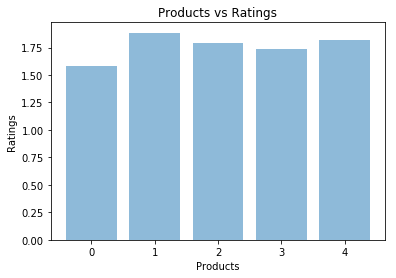

In [91]:
plt.bar(labelX, y, align='center', alpha=0.5)
plt.ylabel('Ratings')
plt.xlabel('Products')
plt.title('Products vs Ratings')

plt.show()

In [92]:
Measurables

,unique_product_name,rating_average
0,Batteries,1.586338
1,Alexa,1.885204
2,Tablet 8in,1.788660
3,Fire HD,1.735656
4,Kindle,1.815104


### Import Dataset

2. Customer orders Dataset

In [93]:
data2 = data2[['order_id', 'product_id' , 'seller_id', 'order_status', 'order_estimated_delivery_date', 'order_delivered_customer_date']]
data2.head()

,order_id,product_id,seller_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
0,94e050666a9b391d3aab71554fe12421,f1d3e7a4605f6cd5f2a3cf9bde5c7845,062ce95fa2ad4dfaedfc79260130565f,delivered,2017-05-16 00:00:00,2017-05-08 17:09:54
1,531a321dff7247e76a5f6c2e702faa99,f1d3e7a4605f6cd5f2a3cf9bde5c7845,062ce95fa2ad4dfaedfc79260130565f,delivered,2017-06-23 00:00:00,2017-06-12 13:54:46
2,4ceb680ca41b58487fec3e0f33c624ef,f1d3e7a4605f6cd5f2a3cf9bde5c7845,062ce95fa2ad4dfaedfc79260130565f,delivered,2017-05-10 00:00:00,2017-05-03 11:37:45
3,b6fa6ea37aeeb90c905eb2a488fc5dc5,8a4505505378c8f5d983f3201e9c25da,062ce95fa2ad4dfaedfc79260130565f,delivered,2017-05-25 00:00:00,2017-05-22 16:07:20
4,2823b5160c0166f3c0d1ea00cc519c7e,ff922797a6771cab4e0c51d482285ec3,062ce95fa2ad4dfaedfc79260130565f,delivered,2017-05-25 00:00:00,2017-05-09 10:04:02


### Understanding the Dataset better

In [94]:
data2.shape

(112650, 6)

In [95]:
data2.describe()

,order_id,product_id,seller_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
count,112650,112650,112650,112650,112650,110196
unique,98666,32951,3095,7,450,95664
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,delivered,2017-12-20 00:00:00,2017-07-31 18:03:02
freq,21,527,2033,110197,604,21
first,NaN,NaN,NaN,NaN,NaN,2016-10-11 13:46:32
last,NaN,NaN,NaN,NaN,NaN,2018-10-17 13:22:46


#### There are total 7 types of order status

In [96]:
uniqueOrderStatus = data2['order_status'].unique()
print(uniqueOrderStatus, len(uniqueOrderStatus), sep="\n")

['delivered' 'invoiced' 'shipped' 'processing' 'canceled' 'unavailable'
 'approved']
7


#### There are total 3095 sellers, we will be selecting 4 sellers

In [97]:
uniqueSellers = data2['seller_id'].unique()
print(uniqueSellers, len(uniqueSellers), sep="\n")

['062ce95fa2ad4dfaedfc79260130565f' '0ea22c1cfbdc755f86b9b54b39c16043'
 '2009a095de2a2a41626f6c6d7722678d' ... '9b1ab052f5fca308ba743ac789ebb2e1'
 'd7d517afce974cd491b8d52bb5b5b1fc' '15ac3c501e2599e4917316fde5c5669a']
3095


In [98]:
sellerIds = ['00fc707aaaad2d31347cf883cd2dfe10', '01fdefa7697d26ad920e9e0346d4bd1b', '0241d4d5d36f10f80c644447315af0bd', '0bae85eb84b9fb3bd773911e89288d54']

for sellerId in sellerIds:
    sel = data2.loc[data2['seller_id'] == sellerId]
    if sellerIds.index(sellerId) == 0:
        selectedData1 = sel
    elif sellerIds.index(sellerId) == 1:
        selectedData2 = sel
    elif sellerIds.index(sellerId) == 2:
        selectedData3 = sel
    elif sellerIds.index(sellerId) == 3:
        selectedData4 = sel
                                 
UniquesellersDf = pd.concat([selectedData1, selectedData2, selectedData3, selectedData4])

In [99]:
UniquesellersDf.head()

,order_id,product_id,seller_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
29954,cd7cebcffafb9a184b1aeec5b2197c3d,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-21 00:00:00,2018-03-02 18:16:47
29955,dd9da3d7a26689e951d0153988f8fb2c,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-13 00:00:00,2018-02-20 00:59:05
29956,4cfd9e02ecb9bfecf560fde716675e87,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-21 00:00:00,2018-03-09 22:28:29
29957,8d8a1fb20cc3bcbed0c51fd0c70bc538,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-14 00:00:00,2018-02-27 16:49:07
29958,dfcdfc43867d1c1381bfaf62d6b9c195,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-09 00:00:00,2018-02-26 18:18:45


In [100]:
UniquesellersDf.shape

(658, 6)

In [101]:
len(UniquesellersDf['seller_id'].unique())

4

In [102]:
num = len(uniqueProductReviews) - len(UniquesellersDf)

In [103]:
df = UniquesellersDf.sample(n = num, replace = True)
UniquesellersDf = pd.concat([UniquesellersDf, df])

In [104]:
UniquesellersDf.shape

(2179, 6)

In [105]:
sellerIDs = [x for x in UniquesellersDf['seller_id']]

In [106]:
len(sellerIDs)

2179

#### Refactor `order_estimated_delivery_date`	& `order_delivered_customer_date` columns

In [107]:
UniquesellersDf['order_estimated_delivery_date'] = pd.to_datetime(UniquesellersDf['order_estimated_delivery_date'])
UniquesellersDf['order_delivered_customer_date'] = pd.to_datetime(UniquesellersDf['order_delivered_customer_date']).dt.date.astype('datetime64[ns]')

In [108]:
UniquesellersDf.head()

,order_id,product_id,seller_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
29954,cd7cebcffafb9a184b1aeec5b2197c3d,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-21,2018-03-02
29955,dd9da3d7a26689e951d0153988f8fb2c,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-13,2018-02-20
29956,4cfd9e02ecb9bfecf560fde716675e87,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-21,2018-03-09
29957,8d8a1fb20cc3bcbed0c51fd0c70bc538,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-14,2018-02-27
29958,dfcdfc43867d1c1381bfaf62d6b9c195,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-09,2018-02-26


In [109]:
data2.to_csv('order_details2.csv', encoding='utf-8', index=False)

### Calculate Seller rating out of 2
1. Based on Order Status

In [110]:
UniquesellersDf.dtypes

order_id                                 object
product_id                               object
seller_id                                object
order_status                             object
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object

In [111]:
rating = []
for x in UniquesellersDf['order_status']:
    if x == 'delivered':
        rating.append(1)
    if x == 'canceled':
        rating.append(0)
    if x == 'unavailable':
        rating.append(0)
    else:
        rating.append(0)

In [112]:
UniquesellersDf['daysDiff'] = UniquesellersDf['order_estimated_delivery_date'] - UniquesellersDf['order_delivered_customer_date']
UniquesellersDf['daysDiff'] = UniquesellersDf['daysDiff'] / numpy.timedelta64(1, 'D')

In [113]:
UniquesellersDf.dtypes

order_id                                 object
product_id                               object
seller_id                                object
order_status                             object
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
daysDiff                                float64
dtype: object

In [114]:
UniquesellersDf.head()

,order_id,product_id,seller_id,order_status,order_estimated_delivery_date,order_delivered_customer_date,daysDiff
29954,cd7cebcffafb9a184b1aeec5b2197c3d,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-21,2018-03-02,19.0
29955,dd9da3d7a26689e951d0153988f8fb2c,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-13,2018-02-20,21.0
29956,4cfd9e02ecb9bfecf560fde716675e87,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-21,2018-03-09,12.0
29957,8d8a1fb20cc3bcbed0c51fd0c70bc538,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-14,2018-02-27,15.0
29958,dfcdfc43867d1c1381bfaf62d6b9c195,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,delivered,2018-03-09,2018-02-26,11.0


In [115]:
rating2 = []
for i in UniquesellersDf['daysDiff']:
    if i <= 0.0:
        rating2.append(0)
    if i > 0.0:
        rating2.append(1)
    else:
        rating2.append(0) 

In [116]:
print(len(rating), len(rating2))

4350 2272


In [117]:
finalRating = [sum(x) for x in zip(rating, rating2)]

In [118]:
initialRating = [x for x in sellerScoreDf['customer_satisfaction_based_on_reviews']]

### Calculate the seller score by suming up the customer reviews score and order details score

In [119]:
sellersatisfactionScore = [sum(x) for x in zip(initialRating, finalRating)]

In [120]:
sellerScoreDf.head()

,product_id,product_name,customer_emotion,customer_satisfaction_based_on_reviews
0,AVpgNzjwLJeJML43Kpxn,Batteries,sad,1
1,AVpgNzjwLJeJML43Kpxn,Batteries,sad,1
2,AVpgNzjwLJeJML43Kpxn,Batteries,joy,3
3,AVpgNzjwLJeJML43Kpxn,Batteries,joy,1
4,AVpgNzjwLJeJML43Kpxn,Batteries,joy,1


In [121]:
len(initialRating)

2179

In [122]:
len(finalRating)

2272

In [123]:
len(sellersatisfactionScore)

2179

### Finally Create the Dataset that contains product_ids, customer_emotions, customer_review_satisfaction_score, customer_order_satisfaction_score and seller_quality_score

In [145]:
secondPartDataFrame = pd.DataFrame()


In [146]:
secondPartDataFrame['product_id'] = sellerScoreDf['product_id']
secondPartDataFrame['product_name'] = sellerScoreDf['product_name']
secondPartDataFrame['seller_id'] = sellerIDs
secondPartDataFrame['seller_name'] = sellerIDs
secondPartDataFrame['customer_emotion'] = sellerScoreDf['customer_emotion']
secondPartDataFrame['seller_quality_score'] = sellersatisfactionScore

#### We will give names to the seller IDs so that it is easy to Identify

In [147]:
secondPartDataFrame['seller_name'].replace(
            to_replace=['00fc707aaaad2d31347cf883cd2dfe10', '01fdefa7697d26ad920e9e0346d4bd1b', '0241d4d5d36f10f80c644447315af0bd', '0bae85eb84b9fb3bd773911e89288d54'],
    value=['Seller1', 'Seller2', 'Seller3', 'Seller4'], inplace=True)

In [148]:
dataset2 = secondPartDataFrame
dataset2.head()

,product_id,product_name,seller_id,seller_name,customer_emotion,seller_quality_score
0,AVpgNzjwLJeJML43Kpxn,Batteries,00fc707aaaad2d31347cf883cd2dfe10,Seller1,sad,3
1,AVpgNzjwLJeJML43Kpxn,Batteries,00fc707aaaad2d31347cf883cd2dfe10,Seller1,sad,2
2,AVpgNzjwLJeJML43Kpxn,Batteries,00fc707aaaad2d31347cf883cd2dfe10,Seller1,joy,5
3,AVpgNzjwLJeJML43Kpxn,Batteries,00fc707aaaad2d31347cf883cd2dfe10,Seller1,joy,2
4,AVpgNzjwLJeJML43Kpxn,Batteries,00fc707aaaad2d31347cf883cd2dfe10,Seller1,joy,3


In [151]:
dataset2['seller_name'].unique()

array(['Seller1', 'Seller2', 'Seller3', 'Seller4'], dtype=object)

In [152]:
dataset2.to_csv('New_seller_quality_scores-28th.csv', encoding='utf-8', index=False)

### Insert the dataset into DB2 on Cloud

In [153]:
dsn_driver = "IBM DB2 ODBC DRIVER"
dsn_database = credentials_1['database'] 
dsn_hostname = credentials_1['host']
dsn_port = "50000"                
dsn_uid = credentials_1['username']      
dsn_pwd = credentials_1['password']

dsn = (
    "DRIVER={{IBM DB2 ODBC DRIVER}};"
    "DATABASE={0};"
    "HOSTNAME={1};"
    "PORT={2};"
    "PROTOCOL=TCPIP;"
    "UID={3};"
    "PWD={4};").format(dsn_database, dsn_hostname, dsn_port, dsn_uid, dsn_pwd)

conn = ibm_db.connect(dsn, "", "")

In [156]:
create_statement = 'CREATE TABLE "SELLERQUALITYSCORE" ("product_id" VARCHAR, "product_name" VARCHAR, "seller_id" VARCHAR, "seller_name" VARCHAR, "customer_emotion" VARCHAR, "seller_quality_score" INTEGER)'
create_statement = create_statement.replace('VARCHAR', 'VARCHAR(256)')
ibm_db.exec_immediate(conn, create_statement)

In [157]:
for index, row in dataset2.iterrows():

    a ='\''
    product_ids = a+str(row['product_id'])+a
    product_names = a+str(row['product_name'])+a
    seller_ids = a+str(row['seller_id'])+a
    seller_names = a+str(row['seller_name'])+a
    customer_emotions = a+str(row['customer_emotion'])+a
    seller_quality_score = a+str(row['seller_quality_score'])+a
    
    insert = 'INSERT INTO %s.SELLERQUALITYSCORE VALUES(%s, %s, %s, %s, %s, %s)' %(dsn_uid, product_ids, product_names, seller_ids, seller_names, customer_emotions, seller_quality_score)
    ibm_db.exec_immediate(conn, insert)